In [2]:
import pandas as pd
import numpy as np


In [4]:
data = pd.read_excel('/content/Student Queries Data (2).xlsx')

In [5]:
print(data.head())
print(data.info())

                                               query     queryType  \
0                                  explain recession      Academic   
1                    define types of economics names     technical   
2                      wish you a happy new year mam      Academic   
3  Sir your lectures are really helpful can u ple...  Course Query   
4  are there any seperate marks for diagram in th...  Course Query   

                                              answer  
0  <!--StartFragment-->A recession is a macroecon...  
1  <!--StartFragment-->Microeconomics is&nbsp;the...  
2                    Happy New Year to you too&nbsp;  
3  <!--StartFragment--><h4 style="box-sizing: bor...  
4  No separate marks allocated...nor in Exam u wi...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22094 entries, 0 to 22093
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   query      22092 non-null  object
 1   queryType  22094 no

In [6]:
print(data.columns)

Index(['query', 'queryType', 'answer'], dtype='object')


In [7]:
print(data.isnull().sum())

query          2
queryType      0
answer       354
dtype: int64


In [8]:
print(f"Duplicate Rows: {data.duplicated().sum()}")
data = data.drop_duplicates()

Duplicate Rows: 60


In [9]:
print(data.dtypes)

query        object
queryType    object
answer       object
dtype: object


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22034 entries, 0 to 22093
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   query      22032 non-null  object
 1   queryType  22034 non-null  object
 2   answer     21686 non-null  object
dtypes: object(3)
memory usage: 688.6+ KB


In [11]:
# Count occurrences of each query
frequent_queries = data['query'].value_counts()

# Display the top 10 most frequent queries
print(frequent_queries.head(10))

query
IN ASSIGNMENT ANSWER SHEET NEED TO WRITE QUESTIONS?                                                                                                                                                                                    10
hello sir , can you pls provide any WhatsApp / telegram groups of students because you are the only who is connected with students and we don't have any connections with other students regarding the regular update of the course     8
is there a group or forum to interact with current distance learning mba nmims students?                                                                                                                                                7
what is the syllabus for the 1st semester exam                                                                                                                                                                                          6
I have done with my assignment, and used Standard English 

In [12]:
frequent_answers = data['answer'].value_counts()

# Display the top 10 most frequent answers
print(frequent_answers.head(10))

answer
<p><b>Kindly restrict  your queries to the session under which you are posting the query. </b></p><p><b>Queries other  than those related to the particular session and/or subject will not be  answered in this section.</b></p><p><b>For all  academic administrative and other queries related to support please approach </b><a><b>NGASCE@nmims.edu</b></a></p>    306
<p>Kindly restrict your  queries to the session under which you are posting the query. Queries other  than those related to the particular session and/or subject will not be  answered in this section. For all academic administrative and other queries  related to support please approach NGASCE@nmims.edu</p><p>Regards,</p><p>NGASCE</p>                        203
Yes                                                                                                                                                                                                                                                                        

In [13]:
data['query_word_count'] = data['query'].apply(lambda x: len(str(x).split()))
data['answer_word_count'] = data['answer'].apply(lambda x: len(str(x).split()))


In [14]:
average_query_words = data['query_word_count'].mean()
average_answer_words = data['answer_word_count'].mean()

print(f'Average words in queries: {average_query_words}')
print(f'Average words in answers: {average_answer_words}')


Average words in queries: 33.0538259054189
Average words in answers: 40.78946174094581


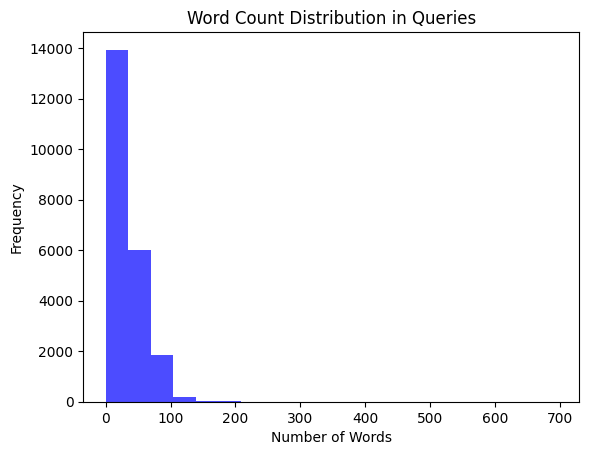

In [15]:
import matplotlib.pyplot as plt

# Plot histogram for word count distribution
plt.hist(data['query_word_count'], bins=20, alpha=0.7, color='blue')
plt.title('Word Count Distribution in Queries')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [16]:
query_type_distribution = data['queryType'].value_counts()

print(query_type_distribution)

queryType
Course Query    11865
Academic         7413
technical        2053
Technical         703
Name: count, dtype: int64


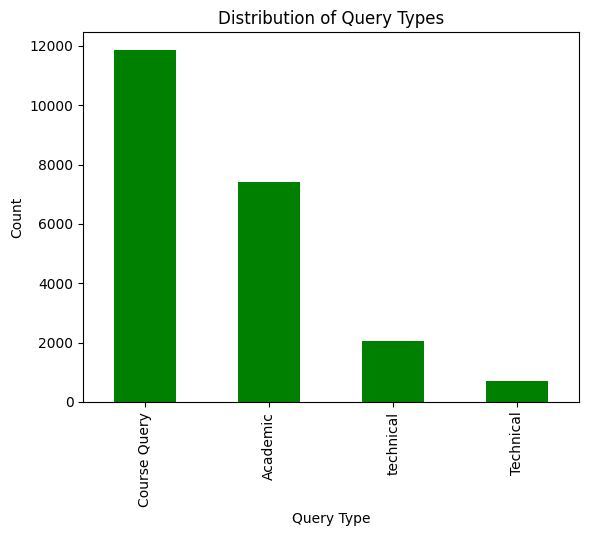

In [17]:
query_type_distribution.plot(kind='bar', color='green')
plt.title('Distribution of Query Types')
plt.xlabel('Query Type')
plt.ylabel('Count')
plt.show()

In [18]:
data['query'] = data['query'].astype(str)
data['answer'] = data['answer'].astype(str)


In [23]:
import re
def remove_html_tags(text):
    # Ensure input is a string
    if not isinstance(text, str):
        return text  # Return as-is if not a string
    return re.sub(r'<.*?>', '', text)

In [24]:
data['query'] = data['query'].apply(remove_html_tags)
data['answer'] = data['answer'].apply(remove_html_tags)


In [29]:
print(data[['query_word_count', 'answer_word_count']].describe())


       query_word_count  answer_word_count
count      22094.000000       22094.000000
mean          33.058704          40.803295
std           24.746980          77.302535
min            0.000000           1.000000
25%           15.000000           8.000000
50%           26.000000          17.000000
75%           45.000000          43.000000
max          695.000000        1320.000000


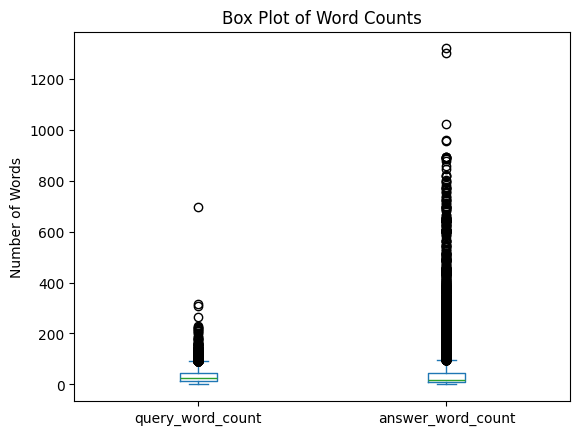

In [25]:
data[['query_word_count', 'answer_word_count']].plot(kind='box')
plt.title('Box Plot of Word Counts')
plt.ylabel('Number of Words')
plt.show()

In [26]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()

# Apply to query and answer columns
data['query'] = data['query'].apply(clean_text)
data['answer'] = data['answer'].apply(clean_text)

In [27]:
html_rows = data[data['query'].str.contains('<.*?>') | data['answer'].str.contains('<.*?>', na=False)]

print(html_rows)


Empty DataFrame
Columns: [query, queryType, answer, query_word_count, answer_word_count]
Index: []


In [37]:
# Function to standardize the 'queryType' column
def standardize_query_type(value):
    value = str(value).lower()  # Convert to lowercase for consistency
    if 'course query' in value or 'academic' in value:
        return 'academic'
    if 'technical' in value:
        return 'technical'
    return value  # Return the original value if no match

# Apply the function to the 'queryType' column
data['queryType'] = data['queryType'].apply(standardize_query_type)

# Verify the changes by displaying value counts
print("Updated 'queryType' column value counts:")
print(data['queryType'].value_counts())

# Preview the updated DataFrame
print("Preview of the updated DataFrame:")
print(data.head())


Updated 'queryType' column value counts:
queryType
academic     19278
technical     2756
Name: count, dtype: int64
Preview of the updated DataFrame:
                                               query  queryType  \
0                                  explain recession   academic   
1                    define types of economics names  technical   
2                      wish you a happy new year mam   academic   
3  sir your lectures are really helpful can u ple...   academic   
4  are there any seperate marks for diagram in th...   academic   

                                              answer  query_word_count  \
0  a recession is a macroeconomic term that refer...                 2   
1  microeconomics isnbspthe study of individuals ...                 5   
2                      happy new year to you toonbsp                 7   
3  ures are really helpful can u please answer fo...                39   
4  no separate marks allocatednor in exam u will ...                11   

   

In [38]:
data.loc[:, 'query'] = data['query'].str.lower()
data.loc[:, 'answer'] = data['answer'].str.lower()

In [43]:
# Expanded keywords for each category based on dataset analysis
academic_keywords = [
    'recession', 'economics', 'syllabus', 'exam', 'assignment',
    'class', 'lecture', 'notes', 'marks', 'grade', 'study',
    'test', 'course', 'curriculum', 'schedule', 'subject', 'topic', 'education'
]
technical_keywords = [
    'error', 'bug', 'install', 'software', 'crash', 'login',
    'update', 'connectivity', 'network', 'hardware', 'issue',
    'technical', 'system', 'configuration', 'reset', 'setup', 'troubleshoot', 'failure'
]

# Function to classify query type based on refined keywords
def classify_query_type(row):
    query = str(row['query']).lower()  # Lowercase for consistent matching
    query_type = row['queryType'].lower()

    # Check if the query contains academic keywords
    if any(keyword in query for keyword in academic_keywords):
        if query_type != 'academic':  # Correct the type if it's wrong
            return 'academic'

    # Check if the query contains technical keywords
    if any(keyword in query for keyword in technical_keywords):
        if query_type != 'technical':  # Correct the type if it's wrong
            return 'technical'

    # Return the original type if no correction is needed
    return query_type

# Apply the refined function to the DataFrame
data['queryType'] = data.apply(classify_query_type, axis=1)

# Verify the changes by displaying value counts
print("Updated 'queryType' column value counts:")
print(data['queryType'].value_counts())

# Optional: Preview the updated DataFrame
print("Preview of the updated DataFrame:")
print(data.head())

Updated 'queryType' column value counts:
queryType
academic     19570
technical     2464
Name: count, dtype: int64
Preview of the updated DataFrame:
                                               query queryType  \
0                                  explain recession  academic   
1                    define types of economics names  academic   
2                      wish you a happy new year mam  academic   
3  sir your lectures are really helpful can u ple...  academic   
4  are there any seperate marks for diagram in th...  academic   

                                              answer  query_word_count  \
0  a recession is a macroeconomic term that refer...                 2   
1  microeconomics isnbspthe study of individuals ...                 5   
2                      happy new year to you toonbsp                 7   
3  ures are really helpful can u please answer fo...                39   
4  no separate marks allocatednor in exam u will ...                11   

   answer

In [44]:
print(data.head())
print(data.info())


                                               query queryType  \
0                                  explain recession  academic   
1                    define types of economics names  academic   
2                      wish you a happy new year mam  academic   
3  sir your lectures are really helpful can u ple...  academic   
4  are there any seperate marks for diagram in th...  academic   

                                              answer  query_word_count  \
0  a recession is a macroeconomic term that refer...                 2   
1  microeconomics isnbspthe study of individuals ...                 5   
2                      happy new year to you toonbsp                 7   
3  ures are really helpful can u please answer fo...                39   
4  no separate marks allocatednor in exam u will ...                11   

   answer_word_count       type  
0                 79   academic  
1                125  technical  
2                  6   academic  
3                106  

In [45]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

# Use the dataset variable `data`
profile = ProfileReport(data, title="EDA Report for Preprocessed Data", explorative=True)
profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
from google.colab import files  # Use this for Google Colab
files.download("eda_report.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
data.to_csv('preprocessed_student_queries.csv', index=False)
from google.colab import files
files.download('preprocessed_student_queries.csv')
data.to_excel('preprocessed_student_queries.xlsx', index=False)
files.download('preprocessed_student_queries.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>